# support vector Assignment 17 salary data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [14]:
df1=pd.read_csv("SalaryData_Train(1).csv")
df2=pd.read_csv("SalaryData_Test(1).csv")

In [15]:
df1.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
14545,56,Self-emp-not-inc,Masters,14,Divorced,Sales,Not-in-family,White,Male,0,1876,60,United-States,<=50K
17802,52,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
25799,59,Federal-gov,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
8126,60,Private,Assoc-acdm,12,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
22444,28,Private,HS-grad,9,Separated,Protective-serv,Other-relative,White,Male,0,0,40,United-States,<=50K


In [16]:
df2.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
3873,23,Private,HS-grad,9,Never-married,Protective-serv,Other-relative,White,Male,0,0,42,United-States,<=50K
11671,38,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,3103,0,40,United-States,>50K
9022,22,Private,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0,0,40,United-States,<=50K
11242,52,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
1425,28,State-gov,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,Black,Female,0,0,40,Germany,<=50K


In [17]:
df1.shape

(30161, 14)

In [18]:
df2.shape

(15060, 14)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [21]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
df2.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [23]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [24]:
df2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


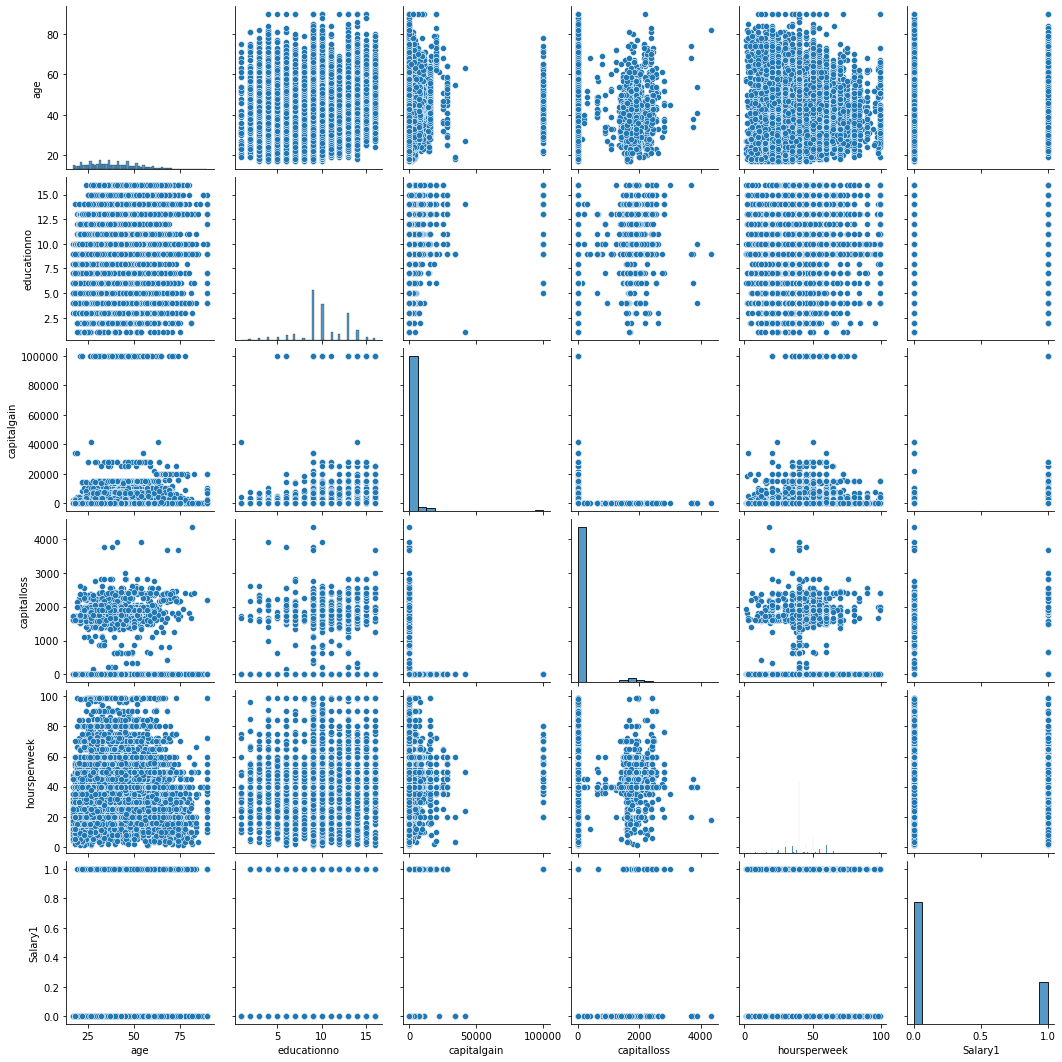

In [74]:
sns.pairplot(df1);

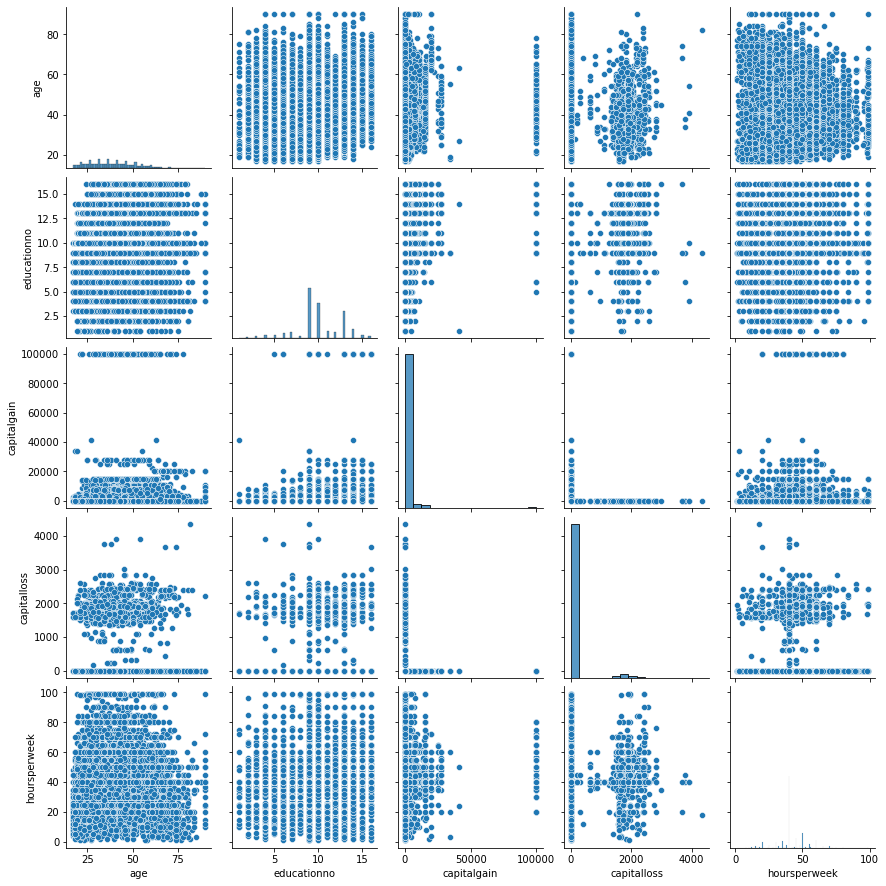

In [75]:
sns.pairplot(df2);

In [25]:
df1.duplicated().sum()

3258

In [26]:
df2.duplicated().sum()

930

In [27]:
df1 = df1.drop_duplicates()

In [28]:
df1.duplicated().sum()

0

In [29]:
df2 = df1.drop_duplicates()

In [30]:
df2.duplicated().sum()

0

In [31]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [32]:
df1['Salary1']= pd.get_dummies(df1['Salary'], drop_first=True)
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Salary1
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [33]:
df1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary1
age,1.000000,0.038048,0.077235,0.052684,0.072529,0.223502
educationno,0.038048,1.000000,0.126085,0.080025,0.145491,0.332178
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403,0.228865
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093,0.153287
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000,0.225812
Salary1,0.223502,0.332178,0.228865,0.153287,0.225812,1.000000


In [34]:
df1.corr()['Salary1']

age             0.223502
educationno     0.332178
capitalgain     0.228865
capitalloss     0.153287
hoursperweek    0.225812
Salary1         1.000000
Name: Salary1, dtype: float64

In [35]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

In [36]:
features = ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

In [37]:
for feature in features:
    unique_features = df1[feature].unique()
    num_features = df1[feature].nunique()
    
    if num_features <= 10:
        print('{} has {} values as {}'.format(feature, num_features, unique_features))
    else:
        print('{} has {} values as {}......'.format(feature, num_features, unique_features[0:10]))

age has 72 values as [39 50 38 53 28 37 49 52 31 42]......
workclass has 7 values as [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education has 16 values as [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc']......
educationno has 16 values as [13  9  7 14  5 10 12  4 16 11]......
maritalstatus has 7 values as [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation has 14 values as [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support']......
relationship has 6 values as [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race has 5 values as [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex has 2 value

In [38]:
df1['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [39]:
df1['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [40]:
df1 = df1.drop('education', axis=1)
df2 = df2.drop('education', axis=1)

In [41]:
df1.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

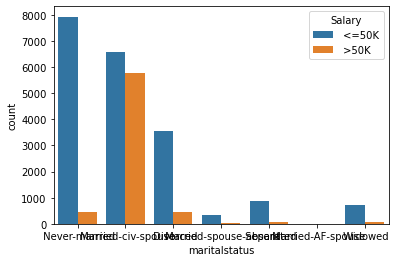

In [42]:
sns.countplot(df1['maritalstatus'],hue=df1['Salary']);

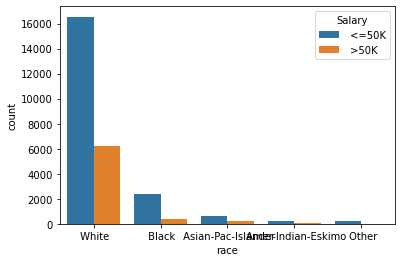

In [43]:
sns.countplot(df1['race'],hue=df1['Salary']);

<AxesSubplot:xlabel='sex', ylabel='count'>

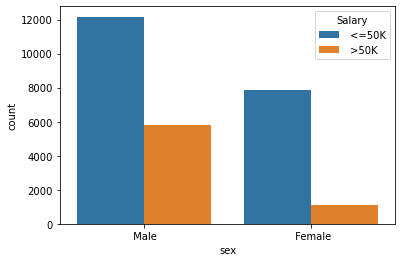

In [44]:
sns.countplot(df1['sex'],hue=df1['Salary'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

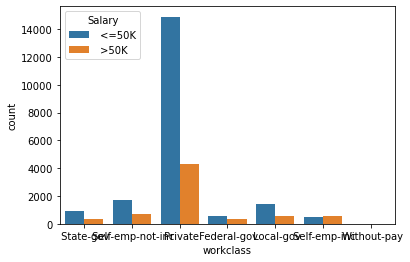

In [45]:
sns.countplot(df1['workclass'],hue=df1['Salary'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

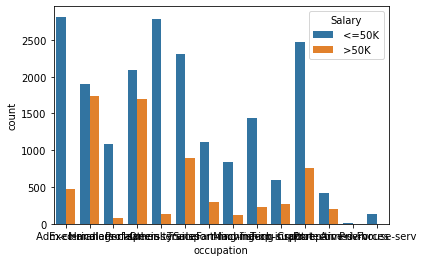

In [46]:
sns.countplot(df1['occupation'],hue=df1['Salary'])

<AxesSubplot:xlabel='age', ylabel='Density'>

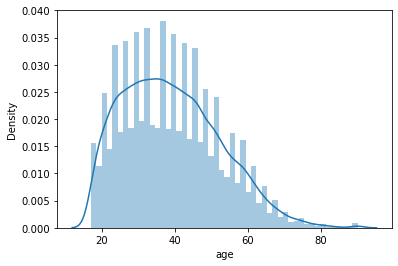

In [47]:
sns.distplot(df1['age'])


<AxesSubplot:xlabel='age'>

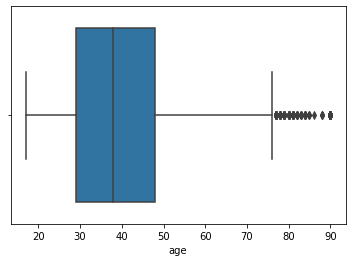

In [48]:
sns.boxplot(df1['age'])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

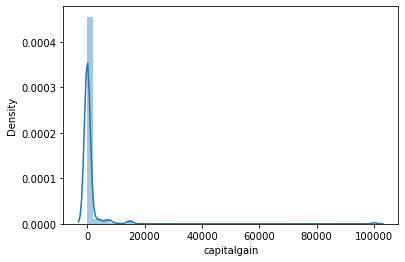

In [49]:
sns.distplot(df1['capitalgain'])

<AxesSubplot:xlabel='capitalgain'>

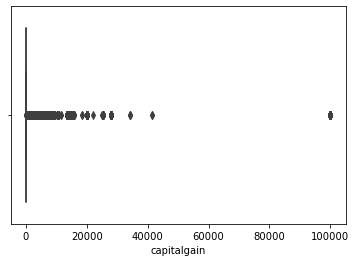

In [50]:
sns.boxplot(df1['capitalgain'])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

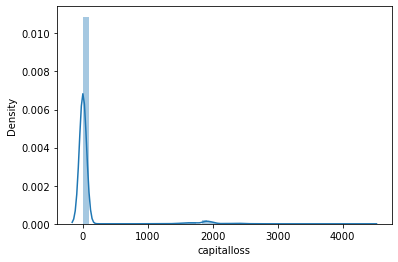

In [51]:
sns.distplot(df1['capitalloss'])

<AxesSubplot:xlabel='capitalloss'>

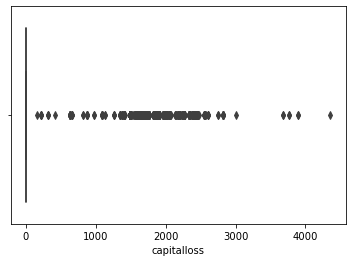

In [52]:
sns.boxplot(df1['capitalloss'])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

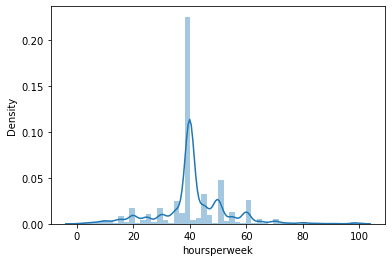

In [53]:
sns.distplot(df1['hoursperweek'])

<AxesSubplot:xlabel='hoursperweek'>

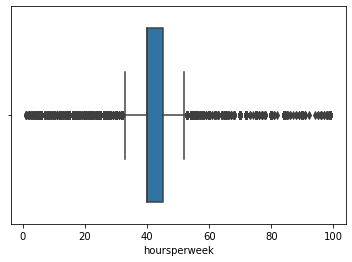

In [54]:
sns.boxplot(df1['hoursperweek'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

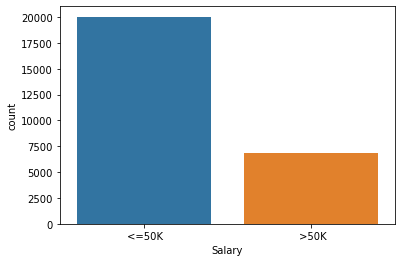

In [55]:
sns.countplot(df1['Salary'])

<AxesSubplot:ylabel='Salary'>

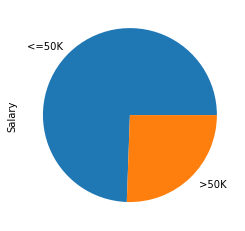

In [56]:
df1['Salary'].value_counts().plot(kind= 'pie')

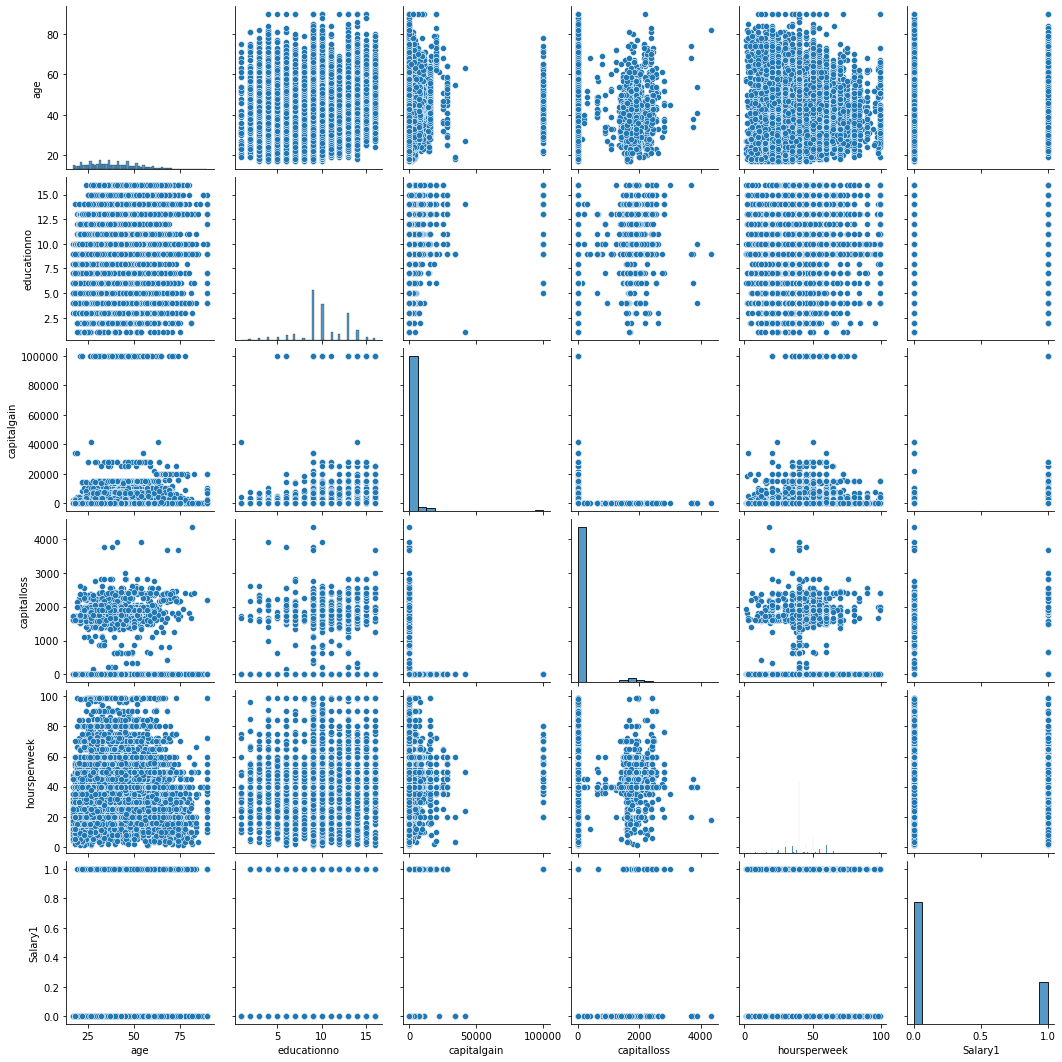

In [57]:
sns.pairplot(df1)

In [58]:
X = df1.drop(['Salary','Salary1'], axis=1)
y = df1['Salary']

In [59]:
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [60]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [61]:
y.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

# Pipeline for Preporcessing and Calassification

In [62]:
X.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native'],
      dtype='object')

# Numerical Transformation

In [63]:
num_col = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
Numerical_Trans = MinMaxScaler()

In [64]:
cat_col = ['workclass','educationno','maritalstatus', 'occupation','relationship', 'race', 'sex', 'native']
Catigorical_Trans = OneHotEncoder(handle_unknown='ignore')

In [65]:
preprocessor = ColumnTransformer(transformers=[('num',Numerical_Trans, num_col),('cat',Catigorical_Trans,cat_col)])

# Pipline

In [66]:
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

In [67]:
x = pipe.fit_transform(X)
x = x.todense()

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
clf = SVC()

In [70]:
clf.fit(x_train,y_train)
#model score in 3 digit after decimal
print('Model Scroe: %.3f' % clf.score(x_test,y_test))

Model Scroe: 0.832


# Grid serarch CV

In [71]:
poly_param = {'kernel': ['poly'], 'gamma': [1, 0.5], 'degree': [2], 'C': [1]}

In [72]:
poly_grid= GridSearchCV(clf, param_grid=poly_param, cv=3)
poly_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1], 'degree': [2], 'gamma': [1, 0.5],
                         'kernel': ['poly']})

In [73]:
poly_grid.best_params_, poly_grid.best_score_

({'C': 1, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, 0.8381191339094879)